# The Instrument

The data you will be working with here was collected by the Hydrogen Epoch of Reionization Array (HERA), a radio interferometer located in South Africa. For general information about HERA, you can visit their website at https://reionization.org/. More detailed information about the telescope design can be found in this paper: https://arxiv.org/pdf/1606.07473.pdf. (You don't need to read this whole paper, only use it if you are hunting for particular information you think will be useful). Some terms that might be useful:

##### Interferometer

Interferometers (as opposed to “single dish”
radio telescopes) consist of a large number of antennas which are connected to
a central (super-)computer called a correlator. The job of the correlator is to
take the signal from every antenna and correlate it with the signal from every
other antenna. So, for example, an array with 128 independent antennas will
produce 8,128 independent correlations.

A principal advantage of interferometers is that they can make high reso-
lution images over a large area of the sky. For a single dish telescope, both
the resolution and the field of view (i.e. how much of the sky the telescope is
sensitive to at any given time) are the same — i.e. a single dish telescope can
be thought of as a single pixel camera. To make images, a single dish scans
its one pixel across the sky. For an interferometer, however, the resolution is
effectively set by the largest antenna separation, while the field of view is set by
the size of any single antenna in the array. So for example, an interferometer
300 meters across, with individual antenna elements 10 meters in size, has the
same resolution as a 300 meter single dish telescope — but a field of view 900 times bigger!

For HERA, the dishes are arranged in hexagonal arrays - see https://reionization.org/science/technical-design/ for images/visualization of this.

##### Baseline

A baseline refers to a pair of dishes. The length and orientation of a baseline is given by the separation vector between the two dishes. 

##### Visibility

A visibility is the actual data product we will look at. Visibilities essentially a measure of the response of a particular baseline to incoming radiation from the sky. So, our final data product will contain a measurement of the visibility for each baseline in the array. Note: the visibilities are imaginary numbers - you may want to think about the best way to deal with that.

### Some more useful info

HERA collects data between 100Mhz and 200Mhz, and for four different polarizations (XX, YY, XY, YX). Therefore, the data product you look at will contain visibilities for each baseline, frequency, polarization, and time. The files uploaded here are only a small portion of a night, so the time axis won't be tremendously long. One particularly useful aspect of the data is that we expect sky signals to be quite steady in time (no rapid changes) - keep this in mind when you are hunting for non-sky effects!

If the above definitions are confusing, or you'd like to find more information on interferometry, there is a textbook on the subject available here: http://www.phys.unm.edu/~gbtaylor/astr423/s98book.pdf. This book goes in much more depth than you need, and is a little outdated in some areas. However, the beginning of Lecture 2 might be a helpful introduction, and you can use the index to search for a particular term that might confuse you.

# Reading the Data

The easiest way to read these data files will be to use the software package pyuvdata. Start by getting pyuvdata working on your computer. You can install using either conda or pip:

'conda install -c conda-forge pyuvdata'
    or
'pip install pyuvdata'

If you have trouble with this installation, more instructions can be found at https://github.com/RadioAstronomySoftwareGroup/pyuvdata. Below is some sample code for reading files into pyuvdata and accessing the data. If you are looking for additional functionality, the full documentation for pyuvdata can be found at https://pyuvdata.readthedocs.io/en/latest/tutorial.html. This includes lots of functionality that doesn't apply to you, so don't spend too much time digging into this. However, there are some examples in the tutorial section that you might find helpful.

In [1]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

In [26]:
uv = UVData()
uv.read('/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458108/zen.2458108.57290.HH.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies (Hz), # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies (Hz), # polarizations)
(82680, 1, 1024, 4)


This data array is your desired data product - it contains the visibilities collected by the array. NOTE: Don't worry about what '# spectral windows' means. This axis should only have length 1 for your data.

Now, Suppose you want to look at only a small chunk of the data. Pick your two favorite antennas and a polarization, and then you can extract the data as such:

In [27]:
# Look at the antennas that are contained in the array:
print(uv.antenna_numbers)
# Pick 2 sample antennas, and get data from that baseline, for a specified polarization
antenna1 = 140
antenna2 = 23
polarization='XX'
data = uv.get_data(antenna1,antenna2,polarization)

[136 140 121  88  41  86  36  51  50  98 123 124  65 137  82 120 143  66
  83 122  67  68  69  70  71  85   0   1  11  12  13  14   2  23  24  25
  26  27  37  38  39  40  52  53  54  55  84  87 141 138 142 139]


There are many ways you can inspect this data, and many types of plots you could utilize. As an example, below is some sample code that will create a 'waterfall plot' for a particular baseline. (A waterfall plot is one that shows evolution in time)

Text(0.5, 0, 'Frequency')

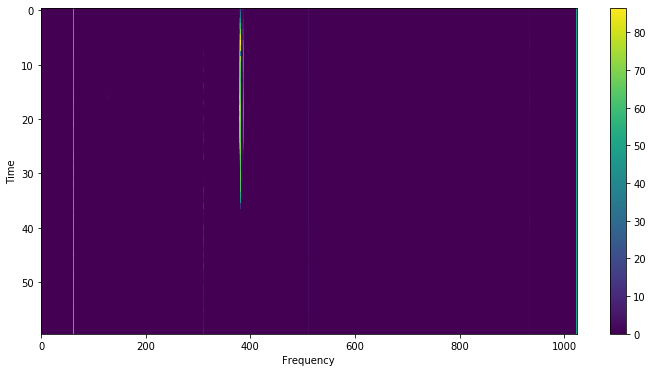

In [28]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data),aspect='auto')
cbar = fig.colorbar(im)
axs.set_ylabel('Time')
axs.set_xlabel('Frequency')

Note: You 

### Working in Matlab

It will be easiest to process this data directly in python, but you can do it in Matlab instead if you wish. You will still want to read in the data with pyuvdata in python, and then transfer the resulting data array to Matlab. There are many ways you can do this, the simplest of which is:

In [12]:
import scipy.io
scipy.io.savemat('data.mat', dict(data=data))